# **HANDS-ON DATA VISUALIZATION**

**ABOUT DATASET**


Dataset yang digunakan merupakan dataset korban tragedi kapal titanic pada 15 April 1912.

Data terdiri atas 891 data dengan 12 variabel dan dapat diakses pada link berikut:
[Data Titanic](https://canvas.instructure.com/courses/6011799/files/201201338/download)

> ## **DATA PRE-PROCESSING**

1. Install dan import library yang dibutuhkan

Sebelum mulai memvisualisasikan data, pertama perlu untuk import library yang akan dibutuhkan. Diantaranya yaitu `numpy`, `pandas`, `matplotlib.pyplot`, dan `seaborn`

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

2. Upload dan read dataset

Selanjutnya, dataset yang akan digunakan di-upload ke google colab. Dataset disimpan dalam bentuk file `.csv`, sehingga untuk membacanya dapat menggunakan library `pandas` yaitu `pd.read_csv`. Dataset didefinisikan sebagai `data_titanic` sebagai berikut

In [ ]:
#Loading the dataset
data_titanic = pd.read_csv('train.csv')

#Print 5 baris pertama dari dataframe.
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_titanic.shape # Melihat dimensi dataframe (n, m) dimana terdiri dari n= jumlah baris dan m= jumlah kolom)

(891, 12)

3. Drop variabel yang tidak digunakan

Untuk mempermudah proses visualisasi data, variabel yang tidak dibutuhkan dapat di drop dari dataframe. Variabel `PassengerId`, `Name`, `Ticket`, dan `Cabin` di drop karena merupakan key sehingga bukan termasuk variabel kategorik maupun numerik dan tidak digunakan dalam visualisasi data.

In [ ]:
data_titanic = data_titanic.drop(columns = ['PassengerId'])
data_titanic = data_titanic.drop(columns = ['Name'])
data_titanic = data_titanic.drop(columns = ['Ticket'])
data_titanic = data_titanic.drop(columns = ['Cabin'])

4. Informasi Dataframe

In [ ]:
data_titanic.info() # Mengetahui informasi tiap variabel mengenai missing value dan tipe data dalam dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Keterangan:

Survived : Kondisi penumpang selamat (alive) atau tidak selamat (dead)

Pclass : Kelas tiket yang dibeli penumpang ( first class, second class, third class)

Sex : Jenis kelamin penumpang

SibSp : Jumlah saudara

Parch : Jumlah orang tua/ anak yang ikut naik kapal

Fare : harga/ongkos yang dibayarkan penumpang

Emparked : Port of embarking, tempat penumpang menaiki kapal

5. Missing Values Checking

Perlu untuk memastikan apakah terdapat missing value atau tidak sebelum visualisasi data. Jika terdapat missing value, dapat dilakukan handling untuk mengatasinya.

In [ ]:
data_titanic.isnull().sum() #Melihat apakah ada missing values (Null/NaN) pada masing-masing variabel/kolom

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Berdasarkan hasil dari missing values checking, diketahui bahwa terdapat 177 missing value pada variabel `Age` dan 2 missing value dari variabel `Embarked`.

5. Missing Value Handling

In [ ]:
# Untuk variabel Age, missing value diatasi dengan mengisi data yang hilang menggunakan nilai mean, karena nilai mean dan median tidak berbeda jauh.
data_titanic['Age'] = data_titanic['Age'].fillna(value=data_titanic['Age'].mean())

In [ ]:
# Untuk variabel Embarked, missing value diatasi dengan mengisi data yang hilang dengan 'Others'
# 'Others' artinya penumpang tersebut menaiki kapal dari tempat yang tidak terdaftar (selain Cherbourg, Queenstown, Southampton)
data_titanic['Embarked'] = data_titanic['Embarked'].fillna(value='Others')

In [ ]:
# Mengecek kembali missing value
data_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Setelah dilakukan missing value handling, sudah tidak terdapat missing value pada semua variabel.

In [ ]:
data_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# menampilkan 5 data teratas dari data yang sudah dilakukan missing value handling
data_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


6. Mengganti data kategorikal

Untuk mempermudah analisis dalam bentuk visualisasi data, value pada data kategorikal diubah menjadi value yang mudah dimengerti. Data kategorikal yang diganti yaitu pada variabel `Survived`, `Pclass`, dan `Embarked`



*   Variabel Survived

Variabel Survived merupakan variabel categorical yang terdiri dari 2 value yaitu 0 dan 1. 0 berarti penumpang meninggal sedangkan 1 berarti penumpang hidup sehingga untuk mempermudah intepratasi melalui visualisasi, 0 diubah menjadi 'Dead' sedangkan 1 diubah menjadi 'Alive'


In [ ]:
for m in range(len(data_titanic['Survived'])):
    if data_titanic['Survived'][m] == 0: # jika data=0 maka diganti dengan Dead
        data_titanic['Survived'][m] = "Dead"
    elif data_titanic['Survived'][m] == 1: # jika data=1 maka diganti dengan Alive
        data_titanic['Survived'][m] = "Alive"
print(data_titanic['Survived'])

0       Dead
1      Alive
2      Alive
3      Alive
4       Dead
       ...  
886     Dead
887    Alive
888     Dead
889    Alive
890     Dead
Name: Survived, Length: 891, dtype: object


*   Variabel Pclass

Variabel Embarked merupakan variabel yang nenunjukkan kelas tiket penumpang. Variabel tersebut terdiri dari 3 kelas yaitu 1, 2, dan 3. 1 artinya First Class, 2 artinya Second Class, dan 3 artinya Third Class.

Untuk mempermudah analisis secara visual, value diubah menjadi:

1 : 1st Class

2 : 2nd Class

3 : 3rd Class

In [ ]:
#Code goes here
for m in range(len(data_titanic['Pclass'])):
    if data_titanic['Pclass'][m] == 1: # jika data=1 maka diganti dengan 1st Class
        data_titanic['Pclass'][m] = "1st Class"
    elif data_titanic['Pclass'][m] == 2: # jika data=2 maka diganti dengan 2nd Class
        data_titanic['Pclass'][m] = "2nd Class"
    elif data_titanic['Pclass'][m] == 3: # jika data=3 maka diganti dengan 3rd Class
        data_titanic['Pclass'][m] = "3rd Class"
print(data_titanic['Pclass'])

0      3rd Class
1      1st Class
2      3rd Class
3      1st Class
4      3rd Class
         ...    
886    2nd Class
887    1st Class
888    3rd Class
889    1st Class
890    3rd Class
Name: Pclass, Length: 891, dtype: object


*   Variabel Embarked

Variabel Embarked merupakan variabel yang nenunjukkan *Port of Embarkation* atau dari mana penumpang menaiki kapal. Variabel tersebut termasuk categorical yang terdiri dari 4 value yaitu C, Q, S, dan Others.

C artinya penumpang naik dari Cherbourgh, Q artinya penumpang naik dari Queenstown, S artinya penumpang naik dari Southampton sedangkan Others artinya penumpang naik dari tempat lainnya yang tidak tercatat.

Dalam hal ini C, Q, S diganti sesuai dengan tempat penumpang naik, sehingga mudah untuk membaca hasil visualisasi.

In [ ]:
for m in range(len(data_titanic['Embarked'])):
    if data_titanic['Embarked'][m] == 'C': # jika data=C maka diganti dengan Cherbourg
        data_titanic['Embarked'][m] = "Cherbourg"
    elif data_titanic['Embarked'][m] == 'Q': # jika data=Q maka diganti dengan Queenstown
        data_titanic['Embarked'][m] = "Queenstown"
    elif data_titanic['Embarked'][m] == 'S': # jika data=S maka diganti dengan Southampton
        data_titanic['Embarked'][m] = "Southampton"
print(data_titanic['Embarked'])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object


> ## **DATA SPLITING**

Untuk mempermudah mem-plot-kan data, variabel dalam dataframe dapat dipisah berdasarkan tipe datanya, yaitu categorical dan numerical.

>> ### **Variabel Numerical**

7. Mengetahui berapa dan apa saja variabel numerical dalam dataframe

In [ ]:
# mendefinisikan apa saja variabel numerikal dalam dataset, yaitu variabel yang memiliki tipe data bukan object
numerical = [var for var in data_titanic.columns if data_titanic[var].dtype!='O']

# jumlah variabel numerik yaitu panjang atau banyaknya varaibel numerik dalam dataset yang tadi didefinisikan dengan 'numerical'
jumlah_numerical=len(numerical)

# print text 'Banyaknya variabel numerical adalah :'
print('Banyaknya variabel numerical adalah :')

#print jumlah/ banyaknya variabel numerikal
print(jumlah_numerical)

# print text 'Variabel numerical adalah :'
print('Variabel numerical adalah :')

#print apa saja variabel numerikal dalam dataset
print(numerical)

Banyaknya variabel numerical adalah :
4
Variabel numerical adalah :
['Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
data_titanic[numerical].head() # Untuk menampilkan 5 data teratas dari variabel numerical dalam dataset

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


>> ### **Variabel Categorical**

8. Mengetahui berapa dan apa saja variabel categorical dalam dataframe

In [ ]:
# mendefinisikan apa saja variabel numerikal dalam dataset, yaitu variabel yang memiliki tipe data bukan object
categorical = [var for var in data_titanic.columns if data_titanic[var].dtype=='O']

# jumlah variabel numerik yaitu panjang atau banyaknya varaibel numerik dalam dataset yang tadi didefinisikan dengan 'categorical'
jumlah_categorical=len(categorical)

# print text 'Banyaknya variabel categorical adalah :'
print('Banyaknya variabel categorical adalah :')

#print jumlah/ banyaknya variabel categorical
print(jumlah_categorical)

# print text 'Variabel categorical adalah :'
print('Variabel categorical adalah :')

#print apa saja variabel categorical dalam dataset
print(categorical)

Banyaknya variabel categorical adalah :
4
Variabel categorical adalah :
['Survived', 'Pclass', 'Sex', 'Embarked']


In [ ]:
data_titanic[categorical].head() # Untuk menampilkan 5 data teratas dari variabel categorical dalam dataset

,Survived,Pclass,Sex,Embarked
0,Dead,3rd Class,male,Southampton
1,Alive,1st Class,female,Cherbourg
2,Alive,3rd Class,female,Southampton
3,Alive,1st Class,female,Southampton
4,Dead,3rd Class,male,Southampton


Setelah dipisahkan, diketahui bahwa variabel numerical terdiri atas variabel

- Age
- SibSp
- Parch
- Fare

Sedangkan variabel categorical terdiri atas variabel:

- Survived
- Pclass
- Sex
- Embarked

> ## **VISUALISASI DATA**

Visualisasi yang akan dilakukan terdiri atas:
- Barplot (horizontal dan vertikal)
- Distplot
- Boxplot
- Scatterplot
- Piechart


>> ## **BARPLOT**

1. Sebelum digunakan barplot, untuk mengetahui count/ jumlah tiap variabel categorical (untuk variabel univariat) digunakan countplot pada library seaborn

- Mengetahui jumlah penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin. Variabel yang menjadi target yaitu `Survived` berdasarkan variabel `Sex`

Referensi:

[*Color Palette*](https://seaborn.pydata.org/tutorial/color_palettes.html#tools-for-choosing-color-palettes)

<Axes: title={'center': 'Jumlah Penumpang Berdasarkan Kondisi dan Jenis Kelamin'}, xlabel='Survived', ylabel='count'>

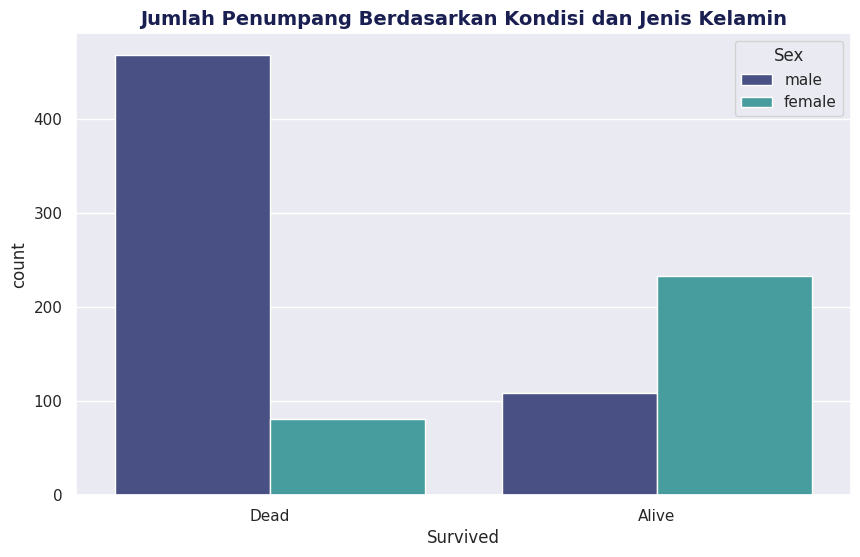

In [ ]:
# Ukuran figure
plt.figure(figsize=(10,6))

# Judul
plt.title('Jumlah Penumpang Berdasarkan Kondisi dan Jenis Kelamin', fontsize = 14, fontweight = 'bold', color = '#1A1F52')

# countplot dengan variabel target x= Survived berdasarkan Sex
# Palette/warna yang digunakan yaitu mako
sns.countplot(x='Survived', hue='Sex', data=data_titanic, palette='mako')

Berdasarkan countplot tersebut dapat diketahui bahwa penumpang yang tidak selamat (Dead) mayoritas berjenis kelamin laki-laki (male) sedangkan penumpang yang selamat didominasi oleh penumpang perempuan (female)

- Mengetahui jumlah penumpang pada tiap kelas berdasarkan kondisi penumpang (selamat atau tidak selamat). Variabel yang menjadi target yaitu `Pclass` berdasarkan variabel `Survived`

<Axes: title={'center': 'Jumlah Penumpang Berdasarkan Kondisi dan Kelas Tiket'}, xlabel='Pclass', ylabel='count'>

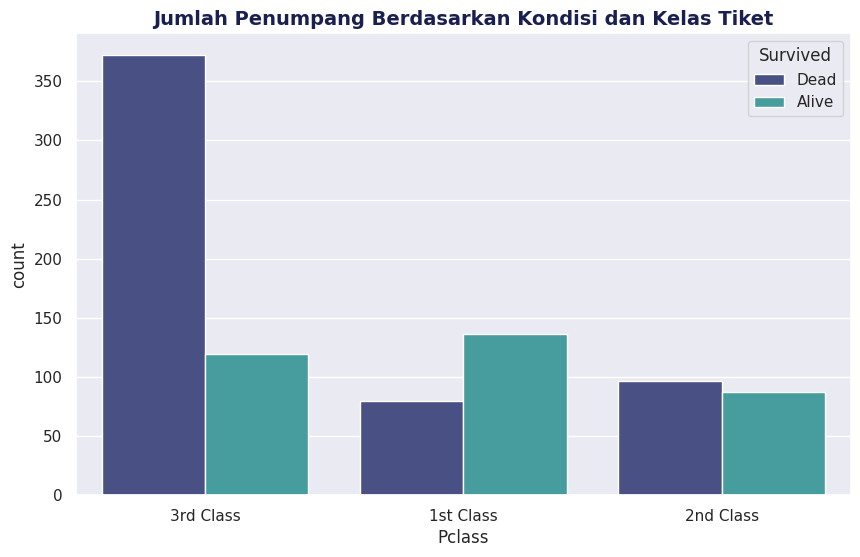

In [ ]:
# Ukuran figure
plt.figure(figsize=(10,6))

# Judul
plt.title('Jumlah Penumpang Berdasarkan Kondisi dan Kelas Tiket', fontsize = 14, fontweight = 'bold', color = '#1A1F52')

# countplot dengan variabel target x=Pclass berdasarkan Survived
# palette yang digunakan yaitu mako
sns.countplot(x='Pclass', hue='Survived', data=data_titanic, palette='mako')

Berdasarkan countplot tersebut, diketahui bahwa penumpang meninggal sebagian besar merupakan penumpang dengan kelas tiket pada Third Class. Sedangkan pada First Class jumlah penumpang yang selamat lebih besar dibanding yang tidak selamat.

2. Untuk mendapatkan informasi dengan bar chart juga dapat digunakan `catplot` pada library `seaborn`. Catplot merupakan kombinasi data categorical dengan `FacerGrid`

- Berikut merupakan catplot yang berisi jumlah penumpang selamat dan tidak selamat berdasarkan masing masing *Port of Embarking* (Embarked) atau tempat penumpang naik kapal.

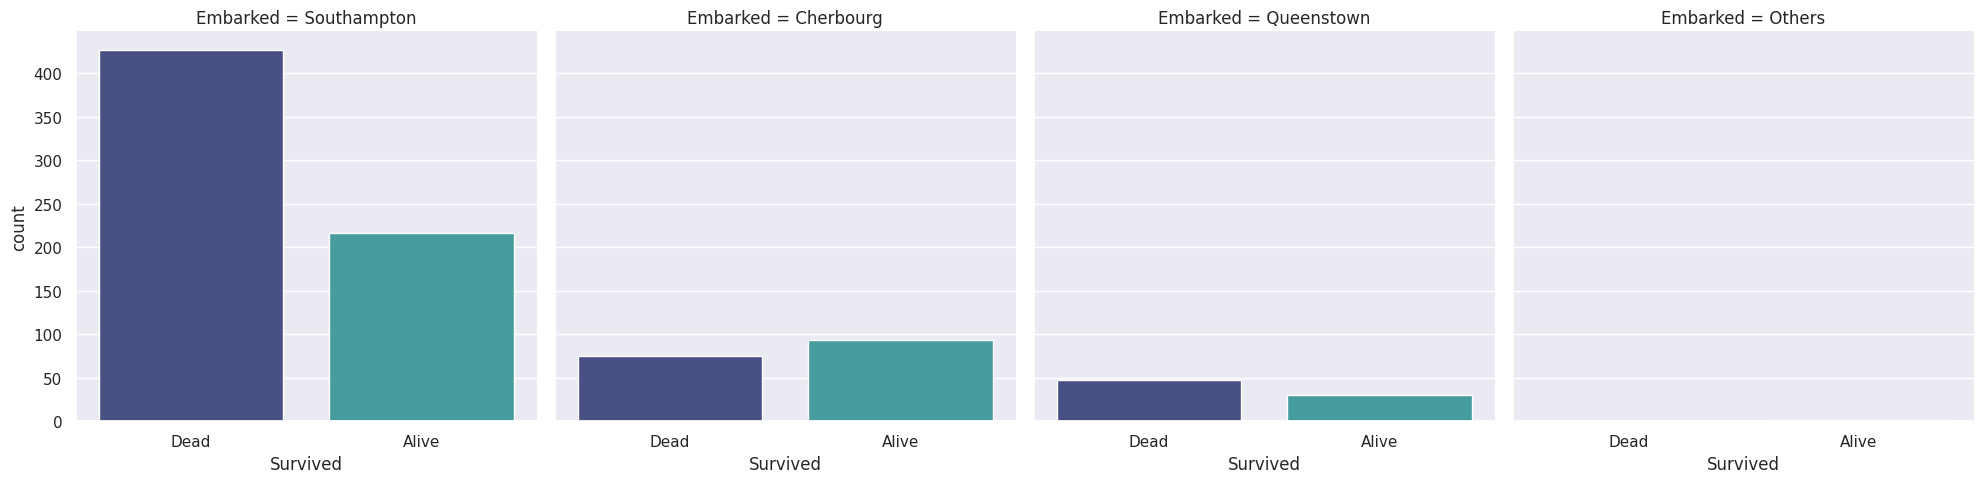

In [ ]:
# Variabel Survived menjadi variabel target (x) dimana jumlah penumpang dihitung berdasarkan variabel Embarked/ tempat pemberangkatan.
# karena tujuan dibuat catplot untuk menghitung jumlah/ count maka kind='count'
# palette atau warna yang digunakan yitu mako
sns.catplot(x='Survived', y=None, col = 'Embarked', data = data_titanic, kind = 'count', palette='mako')

Berdasarkan plot tersebut, diketahui bahwa kebanyakan penumpang berangkat dari Southampton, begitu pula dengan penumpang paling banyak meninggal merupakan penumpang yang berangkat dari tempat tersebut.

- Berikut merupakan catplot untuk menghitung jumlah penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin.

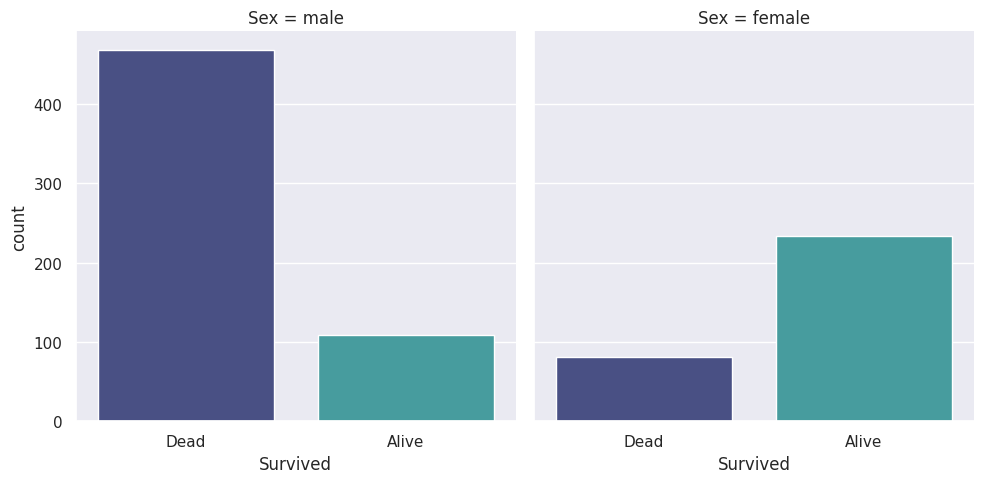

In [ ]:
# Variabel Survived menjadi variabel target, dimana jumlah penumpang dihitung berdasarkan jenis kelamin (Sex)
# karena tujuan dibuat catplot untuk menghitung jumlah/ count maka kind='count'
# palette atau warna yang digunakan yitu mako
sns.catplot(x='Survived', y=None, col = 'Sex', data = data_titanic, kind = 'count', palette='mako')

Berdasarkan hasil catplot diatas, diketahui bahwa sebagian besar penumpang yang tidak selamat (Dead) merupakan penumpang laki-laki. Sebaliknya, penumpang perempuan mayoritas selamat (Alive).

3. BARPLOT

Untuk membuat plot bar (barplot/ bar chart) dengan 2 variabel, digunakan `barplot` pada library `seaborn`. Variabel yang digunakan dalam barplot harus terdiri atas variabel categorical dan variabel numerical. Barplot menampilkan rata-rata dari variabel numeric pada tiap tiap value pada variabel categoric

<Axes: title={'center': 'Rata-Rata Fare Pada Tiap Embarked'}, xlabel='Embarked', ylabel='Fare'>

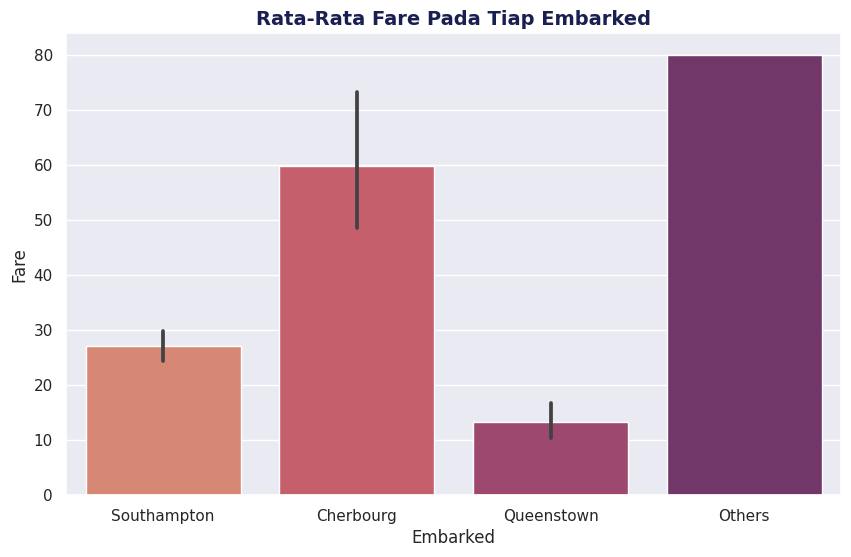

In [ ]:
# Ukuran Figure
plt.figure(figsize=(10,6))
#Judul
plt.title('Rata-Rata Fare Pada Tiap Embarked', fontsize = 14, fontweight = 'bold', color = '#1A1F52')
# Barplot dengan x adalah variabel Embarked dan y adalah variabel Fare.
# Plot tersebut didasarkan atas variabel Survived, yaitu kondisi penumpang selamat atau tidak.
# Palette/warna yang digunakan yaitu flare
sns.barplot(x='Embarked', y='Fare', data=data_titanic, palette='flare', orient='v')

Barplot tersebut menunjukkan rata rata Fare yang dibayar oleh para penumpang pada tiap *Port of Embarking* (Embarked). Diketahui bahwa penumpang dengan tempat pemberangkatan 'Others' atau dari port yang tidak terdaftar, memiliki rata-rata Fare tertinggi dibanding yang lainnya. Sedangkan penumpang yang berangkat dari Queenstown memiliki rata-rata fare/ongkos yang paling murah.

Dari barplot diatas, jika ingin membandingkan Fare dan Embarked dengan kondisi penumpang (Survived), dapat dengan menambahkan `hue='Survived'`

<Axes: title={'center': 'Rata-Rata Fare Pada Tiap Embarked Berdasarkan Kondisi Penumpang'}, xlabel='Fare', ylabel='Embarked'>

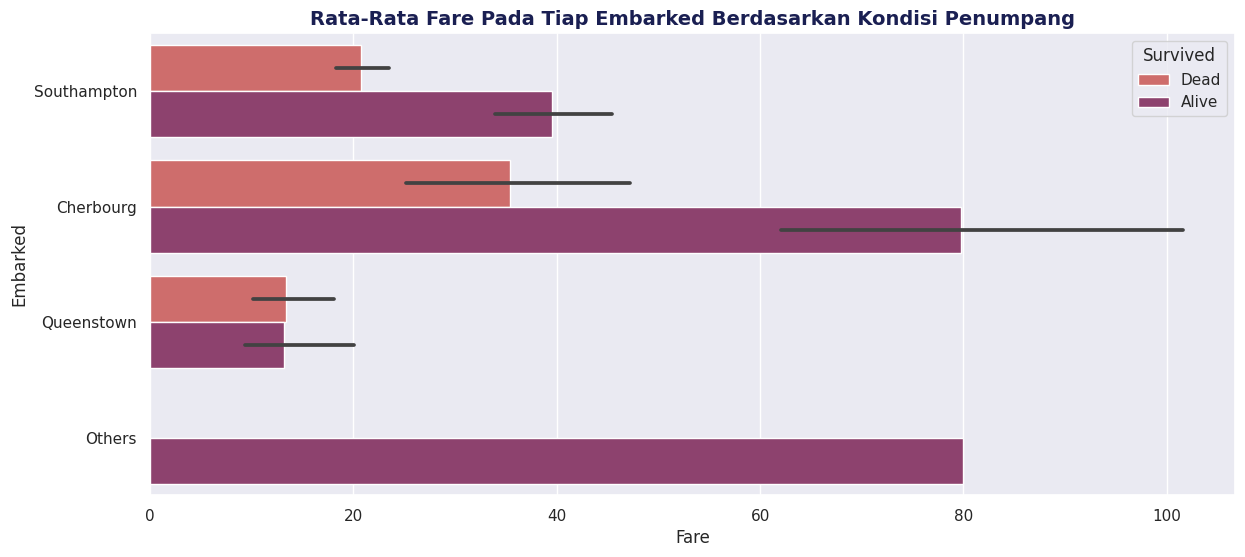

In [ ]:
# Ukuran Figure
plt.figure(figsize=(14,6))
#Judul
plt.title('Rata-Rata Fare Pada Tiap Embarked Berdasarkan Kondisi Penumpang', fontsize = 14, fontweight = 'bold', color = '#1A1F52')
# Barplot dengan orientasi horizontal
sns.barplot(x='Fare', y='Embarked', hue='Survived', data=data_titanic, palette='flare', orient='h') # pada orientasi horizontal variabel x dan y dibalik

Barplot tersebut, memberikan informasi yang lebih mendetail lagi jika dibanding barplot sebelumnya. berdasarkan barplot diatas, diketahui bahwa hampir di semua tempat pemberangkatan/ *port of embarked*, jumlah penumpang yang selamat rata-rata membayar Fare lebih tinggi dibanding penumpang yang tidak selamat.

In [ ]:
# note: ternyata jika dilihat bahwa penumpang yang berasal dari Embarked 'Others' berjumlah 2 orang dan semuanya selamat dan mereka membayar Fare yang sama yaitu 80
df=data_titanic[(data_titanic['Embarked']=='Others')&(data_titanic['Survived']=='Alive')]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
829,Alive,1st Class,female,62.0,0,0,80.0,Others
61,Alive,1st Class,female,38.0,0,0,80.0,Others


<Axes: xlabel='Embarked', ylabel='Age'>

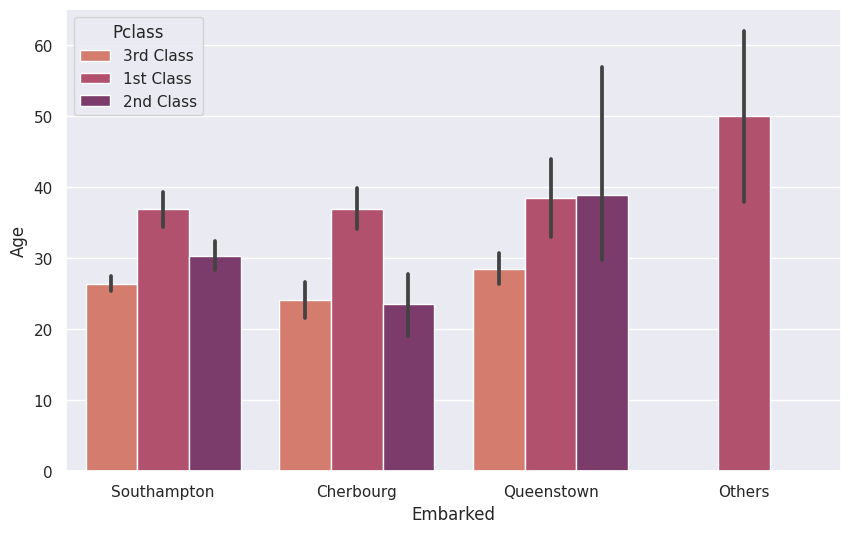

In [ ]:
# Ukuran Figure
plt.figure(figsize=(10,6))

# Barplot dengan x adalah variabel Embarked dan y adalah variabel .
# Plot tersebut didasarkan atas variabel Survived, yaitu kondisi penumpang selamat atau tidak.
# Palette/warna yang digunakan yaitu flare
sns.barplot(x='Embarked', y='Age', hue='Pclass', data=data_titanic, palette='flare')

<Axes: xlabel='Age', ylabel='Embarked'>

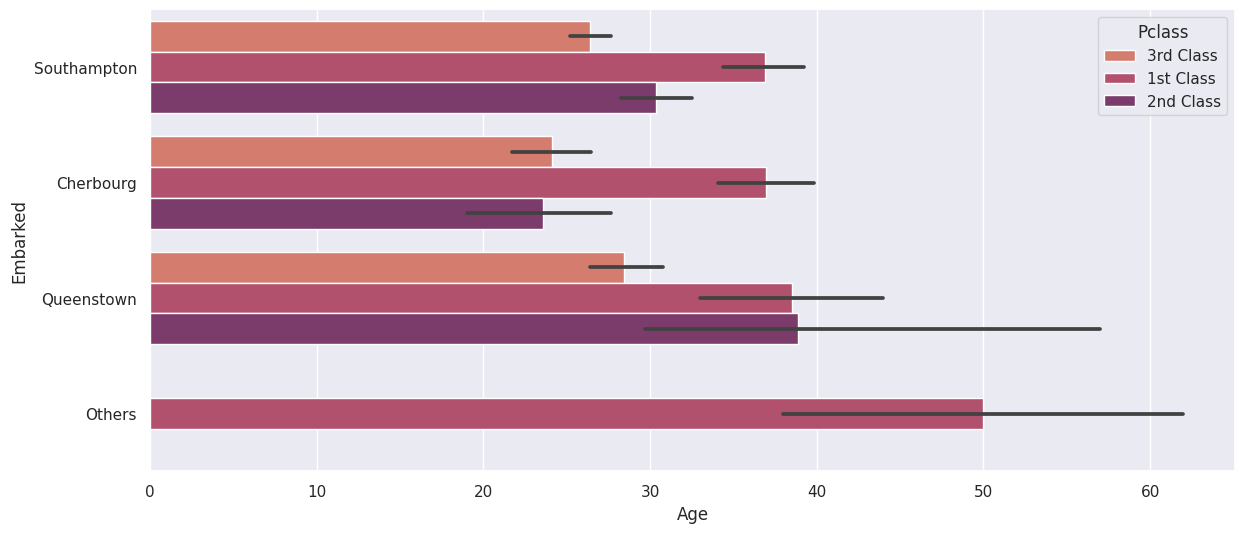

In [ ]:
# Barplot yang sama dengan orientasi horizontal
plt.figure(figsize=(14,6))
sns.barplot(x='Age', y='Embarked', hue='Pclass', data=data_titanic, palette='flare', orient='h')

Barplot tersebut menunjukkan rata-rata usia penumpang untuk tiap tiap Embarked dan Ticket Class yang berbeda. Penumpang dengan Embarked Others hanya berada di First Class dan memiliki rata-rata usia yang lebih tua dibanding yang lain.

<Axes: xlabel='Sex', ylabel='Fare'>

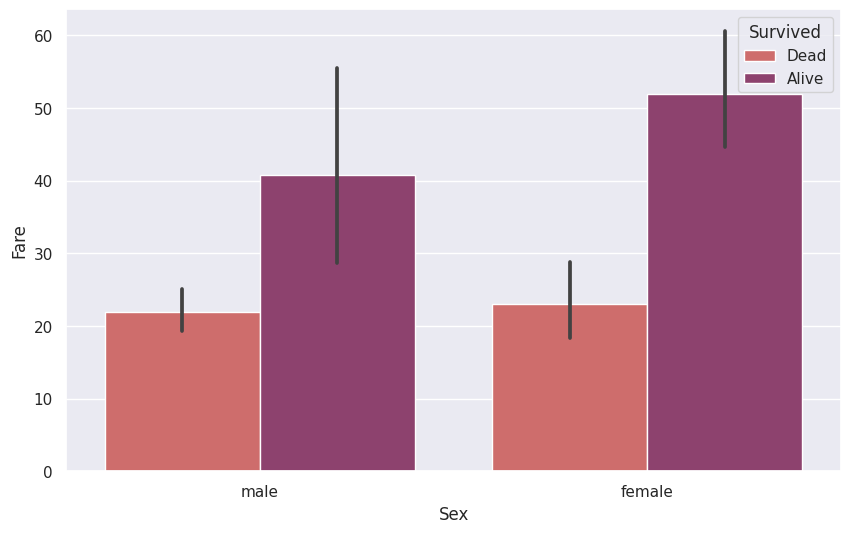

In [ ]:
# Ukuran Figure
plt.figure(figsize=(10,6))

# Barplot dengan x adalah variabel Sex dan y adalah variabel Fare.
# Plot tersebut didasarkan atas variabel Survived, yaitu kondisi penumpang selamat atau tidak.
# Palette/warna yang digunakan yaitu flare
sns.barplot(x='Sex', y='Fare', hue='Survived', data=data_titanic, palette='flare')

Berdasarkan Barplot tersebut, diketahui bahwa penumpang yang selamat baik laki-laki maupun perempuan merupakan penumpang yang membayar rata-rata Fare lebih tinggi dan penumpang yang tidak selamat merupakan penumpang yang membayar rata-rata fare yang lebih rendah.

<Axes: xlabel='Sex', ylabel='Age'>

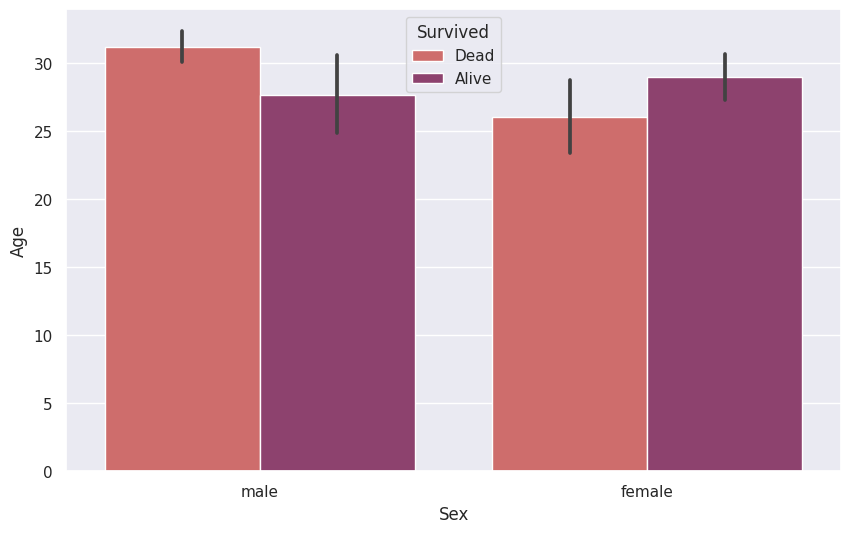

In [ ]:
# Ukuran Figure
plt.figure(figsize=(10,6))

# Barplot dengan x adalah variabel Sex dan y adalah variabel Age.
# Plot tersebut didasarkan atas variabel Survived, yaitu kondisi penumpang selamat atau tidak.
# Palette/warna yang digunakan yaitu flare
sns.barplot(x='Sex', y='Age', hue='Survived', data=data_titanic, palette='flare')

Berdasarkan barplot tersebut, diketahui bahwa
1. Penumpang laki-laki yang tidak selamat rata-rata berusia 30an tahun
2. Penumpang laki-laki yang selamat rata-rata berusia 20an tahun
3. Penumpang perempuan yang selamat rata-rata berusia 25an tahun
4. Penumpang perempuan yang selamat rata-rata berusia mendekati 30an tahun

> ## **DISTPLOT**

Distplot dapat digunakan untuk mengetahui persebaran data, skewness dan kurtosis. Jenis plot ini digunakan untuk variabel numerik

<Axes: xlabel='Age', ylabel='Density'>

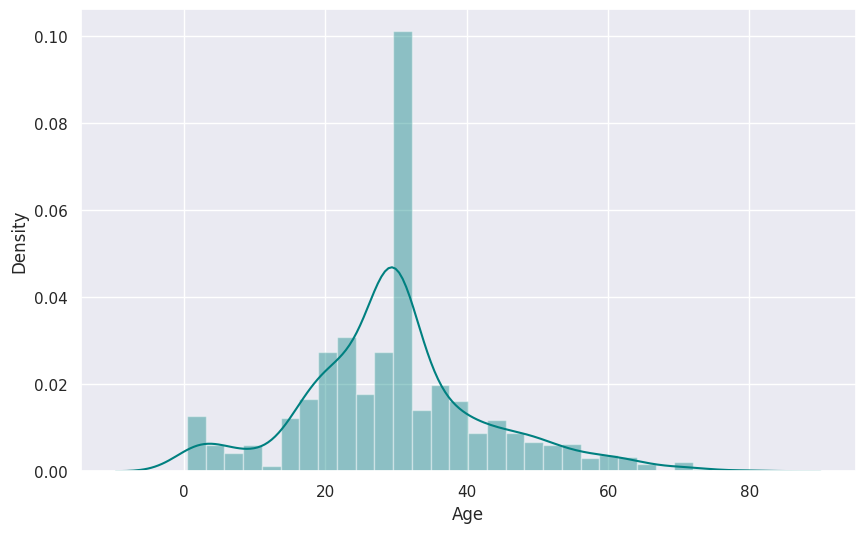

In [ ]:
# Melihat persebaran data dan skewness pada variabel Age menggunakan distplot

#Ukuran Figure
plt.figure(figsize=(10,6))

# Variabel target yang digunakan yaitu variabel Age
# colors atau warna yang digunakan yaitu warna teal
sns.distplot(data_titanic['Age'], color='teal')

<Axes: xlabel='Fare', ylabel='Density'>

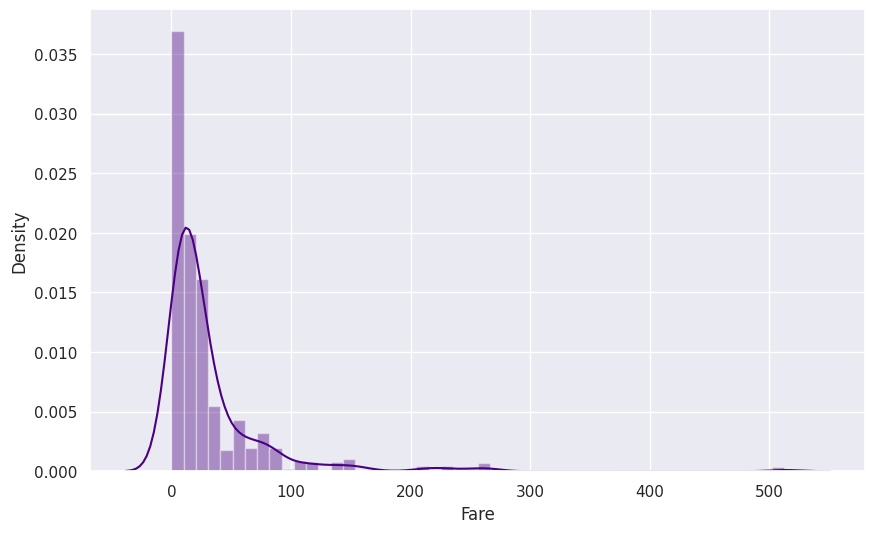

In [ ]:
# Melihat persebaran data dan skewness pada variabel Fare menggunakan distplot
#Ukuran Figure
plt.figure(figsize=(10,6))

# Variabel target yang digunakan yaitu variabel Fare
# colors atau warna yang digunakan yaitu warna indigo
sns.distplot(data_titanic['Fare'], color='indigo')

Berdasarkan distplot diatas, diketahui bahwa berdasarkan Fare, data tersebar tidak merata dan terdapat banyak outliers. Data cenderung berkumpul pada Fare rendah. Yang artinya bahwa mayoritas penumpang dalam kapal titanic merupakan penumpang yang membayar Fare rendah/ murah

> ## **BOXPLOT**

Boxplot dapat digunakan untuk mengetahui apakah ada outlier dalam data atau tidak. Pada boxplot, outlier yaitu titik data yang berada diluar atau melebihi whisker.

<Axes: >

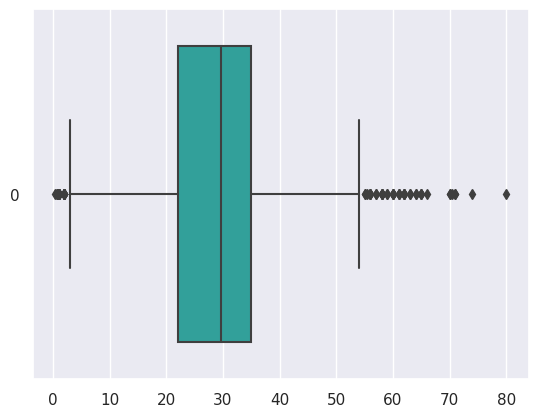

In [ ]:
sns.boxplot(data_titanic['Age'],color='lightseagreen',orient='h')

<Axes: >

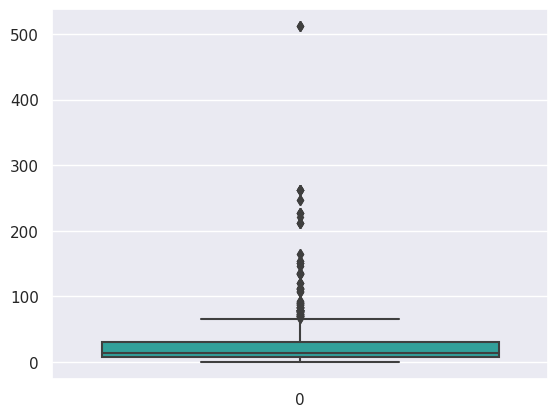

In [ ]:
sns.boxplot(data_titanic['Fare'],color='lightseagreen',orient='v')

Berdasarkan boxplot tersebut, diketahui bahwa terdapat banyak pencilan pada variabel Age dan Fare. Hal ini dapat dilihat bahwa terdapat banyak titik data yang melebihi whisker yang menunjukkan nilai ekstrem. Namun, outlier tersebut sebaiknya jangan dihilangkan ataupun di transformasi karena akan emnyebabkan informasi dan kesimpulan dari data tersebut berubah. Sebab, outlier tersebut ada bukan karena kesalahan tetapi memang data real yang ditemukan. Sebagai contoh pada variabel Fare terdapat outlier data pada nilai lebih dari 500, hal ini karena memang terdapat penumpang yang membayar Fare/Ongkos lebih dari 500.

> ## **SCATTERPLOT**

Scatterplot dapat digunakan untuk melihat persebaran data dalam dataset.

Berikut merupakan scatterplot untuk melihat persebaran data penumpang titanic berdasarkan Age dan Fare.

Untuk melihat lebih jauh mengenai persebaran penumpang selamat atau tidak, ditambahkan hue='Survived, dimana titik yang berwarna biru artinya tidak selamat, sedangkan yang berwarna oren artinya penumpang selamat

<Axes: xlabel='Age', ylabel='Fare'>

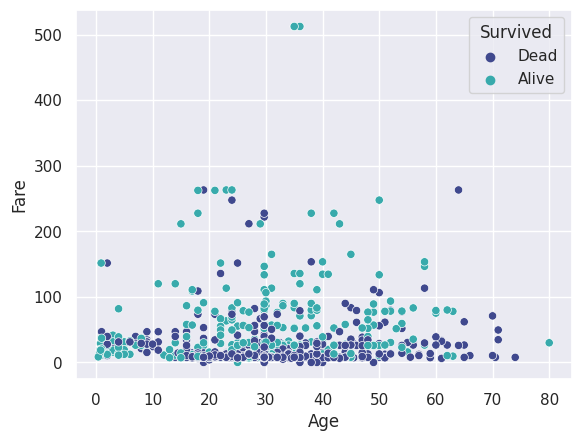

In [ ]:
# Scatterplot persebaran data berdasarkan Age dan Fare, dengan hue berdasarkan kondisi penumpang (Survived)
# Palette yang digunakan yaitu mako
sns.scatterplot(data=data_titanic, x='Age', y= 'Fare', hue='Survived', palette='mako')

Berdasarkan scatterplot, dapat diperoleh insight sebagai berikut:
1. Penumpang berasal dari rentang usia yang berbeda beda antara 0 hingga 80 tahun.
2. Penumpang tertua berusia 80 tahun dan selamat
3. Mayoritas penumpang merupakan penumpang dengan biaya perjalanan/ongkos/fare dibawah 100.
4. Terdapat penumpang dengan ongkos/fare tertinggi diatas 500, dan penumpang tersebut selamat.
5. Kebanyakan penumpang tidak selamat berada pada rentang usia 20 hingga 50 tahun dengan fare dibawah 50.
6. Mayoritas penumpang anak-anak dibawah usia 10 tahun selamat

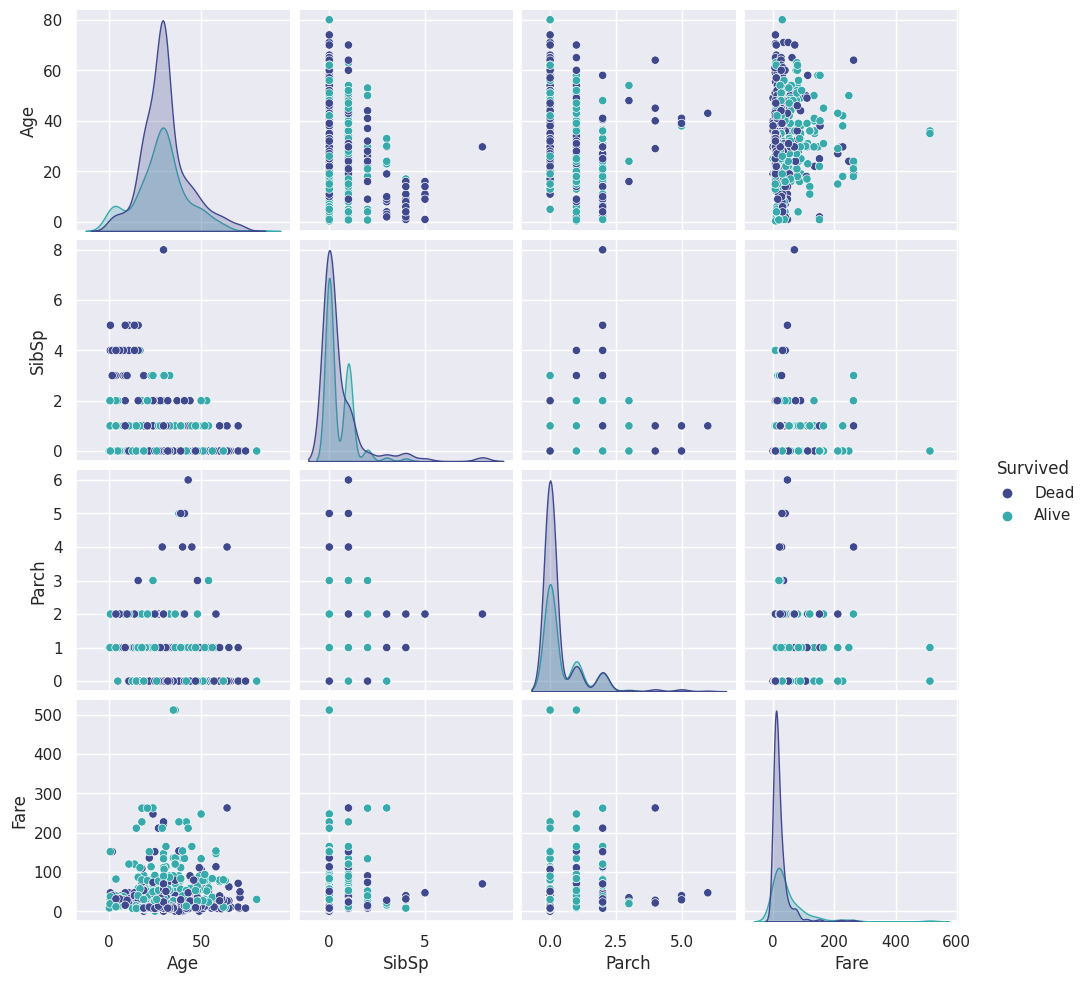

In [ ]:
# Untuk melihat semua persebaran data antar 2 variabel, dapat dilihat dengan menggunakan pairplot seperti berikut
sns.pairplot(data_titanic, hue='Survived', palette='mako')

> ## **PIECHART**

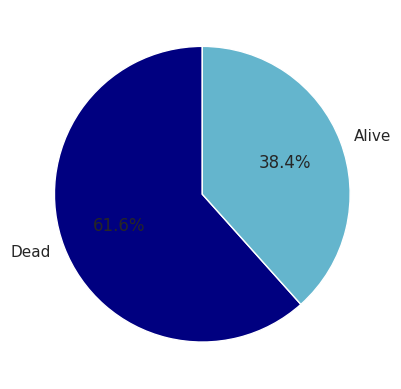

In [ ]:
# Menghitung jumlah penumpang yang selamat dan tidak selamat
dead_count = len(data_titanic[data_titanic['Survived'] == 'Dead'])
survived_count = len(data_titanic[data_titanic['Survived'] == 'Alive'])

# Membuat pie chart dengan hasil perhitungan
labels = ['Dead', 'Alive'] # label pada pie chart yang akan ditampilkan
count2 = [dead_count, survived_count] # hasil perhitungan jumlah penumpang selamat dan tidak selamat

# warna yang digunakan
color=('navy','c')

plt.pie(count2, labels=labels, autopct='%1.1f%%', colors=color, startangle=90)
# autopct artinya menampilkan secara otomatis persentase
# startangle digunakan untuk menentukan dari mana angel pie chart dimulai

# Show the pie chart
plt.show()

Berdasarkan pie chart diatas, diketahui bahwa 61.6% penumpang tidak selamat, sedangkan sebanyak 38.4% penumpang selamat

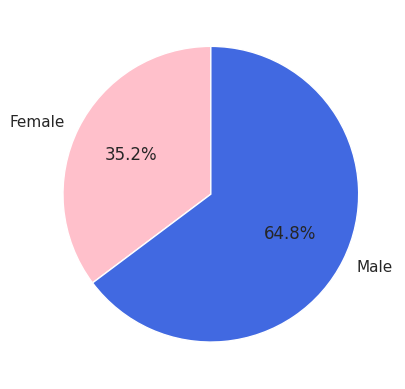

In [ ]:
# Menghitung jumlah laki-laki dan perempuan
female_count = len(data_titanic[data_titanic['Sex'] == 'female'])
male_count = len(data_titanic[data_titanic['Sex'] == 'male'])

# Membuat pie chart dengan hasil perhitungan
labels = ['Female', 'Male'] # label pada pie chart yang akan ditampilkan
count1 = [female_count, male_count] # hasil perhitungan penumpang laki-laki dan perempuan

# warna yang digunakan
color=('pink','royalblue')

plt.pie(count1, labels=labels, autopct='%1.1f%%', colors=color, startangle=90)
# autopct artinya menampilkan secara otomatis persentase
# startangle digunakan untuk menentukan dari mana angel pie chart dimulai


# Show the pie chart
plt.show()

Berdasarkan hasil pie chart, diketahui bahwa sebanyak 64.8% penumpang berjenis kelamin laki-laki, sedangkan sisanya sebanyak35.2% merupakan penumpang perempuan

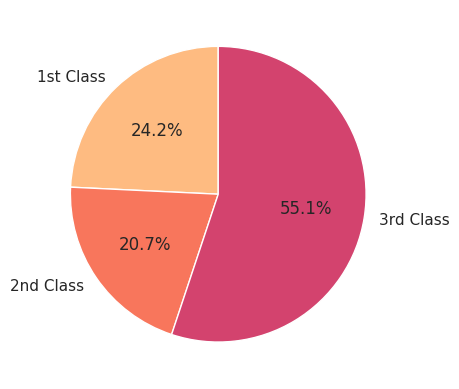

In [ ]:
# Menghitung jumlah penumpang untuk masing-masing kelas
kelas1_count = len(data_titanic[data_titanic['Pclass'] == '1st Class'])
kelas2_count = len(data_titanic[data_titanic['Pclass'] == '2nd Class'])
kelas3_count = len(data_titanic[data_titanic['Pclass'] == '3rd Class'])

labels = ['1st Class', '2nd Class', '3rd Class']
sizes = [kelas1_count, kelas2_count, kelas3_count]

# palette yang digunakan merupakan palette pada library seaborn yaitu magma_r
palette_color = sns.color_palette('magma_r')

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=palette_color, startangle=90)
# autopct artinya menampilkan secara otomatis persentase
# startangle digunakan untuk menentukan dari mana angel pie chart dimulai

# Show the pie chart
plt.show()

Berdasarkan piechart diatas, diketahui bahwa mayoritas penumpang merupakan penumpang dengan Third Class Ticket